In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [21]:
df_train = pd.read_csv("/kaggle/input/train-data/train.csv")
df_test = pd.read_csv("/kaggle/input/test-data/test.csv")

In [22]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [23]:
df_train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [24]:
df_train.shape

(54273, 13)

In [25]:
df_train.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [26]:
train_id = df_train['id']
test_id = df_test['id']

In [27]:
df_train.drop(columns=['id'], inplace = True)
df_test.drop(columns=['id'], inplace = True)

In [28]:
df_test.shape

(36183, 11)

In [29]:
# let's have a look at how many labels each variable has
for col in df_train.columns:
    print(col, ': ', len(df_train[col].unique()), ' labels')

brand :  53  labels
model :  1827  labels
model_year :  34  labels
milage :  3212  labels
fuel_type :  7  labels
engine :  1061  labels
transmission :  46  labels
ext_col :  260  labels
int_col :  124  labels
accident :  2  labels
clean_title :  1  labels
price :  1481  labels


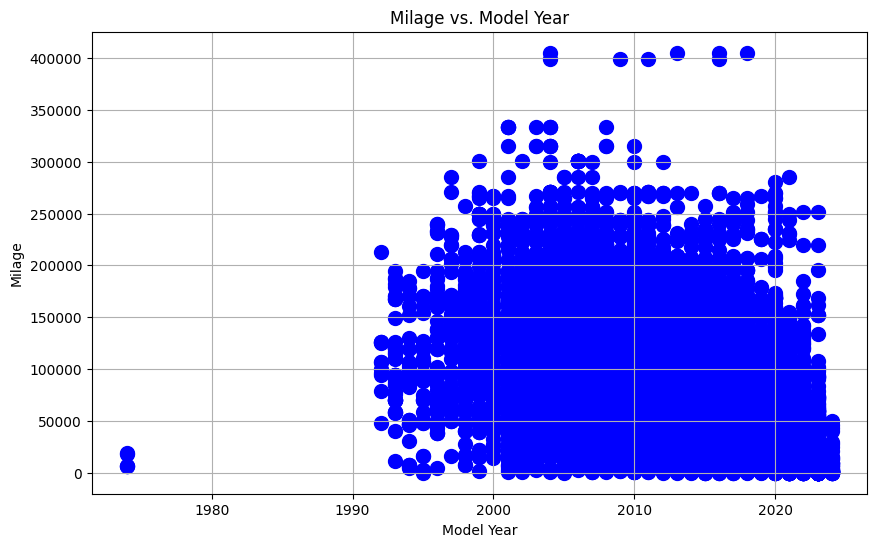

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['model_year'], df_train['milage'], color='blue', s=100)
plt.title('Milage vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Milage')
plt.grid(True)
plt.show()

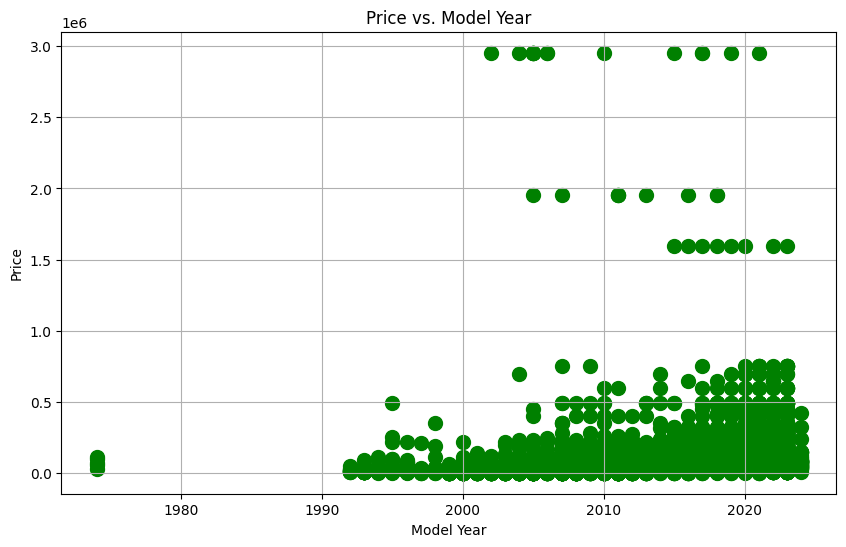

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['model_year'], df_train['price'], color='green', s=100)
plt.title('Price vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

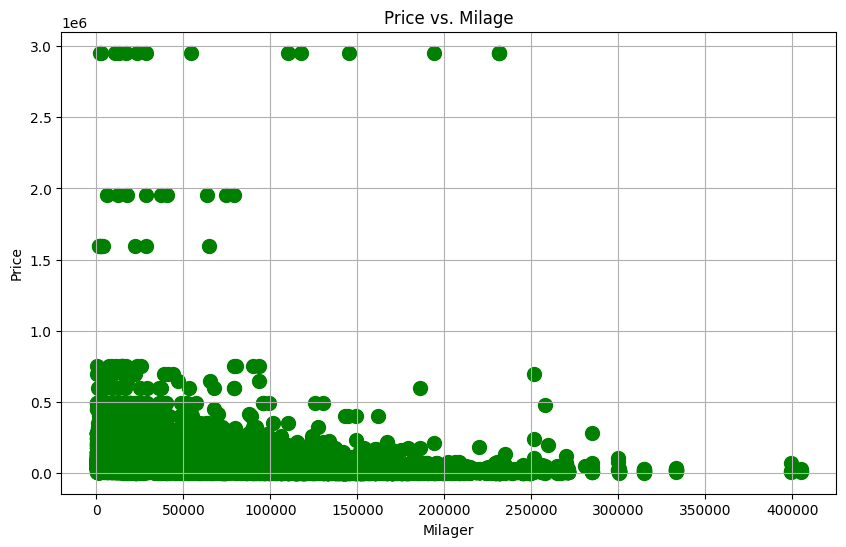

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['milage'], df_train['price'], color='green', s=100)
plt.title('Price vs. Milage')
plt.xlabel('Milager')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [33]:
df_train[df_train['milage']>350000]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
8674,Mazda,MX-5 Miata RF Grand Touring,2016,405000,Gasoline,155.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Brown,Black,None reported,Yes,16750
15749,Mercedes-Benz,Sprinter 2500,2011,399000,Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,5-Speed A/T,White,–,At least 1 accident or damage reported,Yes,13000
15822,Mercedes-Benz,Sprinter 2500,2004,399000,Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,5-Speed A/T,White,Gray,None reported,Yes,9950
20025,Ford,F-350 Lariat Super Duty Crew Cab,2009,399000,Diesel,350.0HP 6.4L 8 Cylinder Engine Diesel Fuel,5-Speed A/T,White,Beige,None reported,Yes,69995
39640,Chevrolet,Corvette Base,2004,405000,Gasoline,345.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Orange,Black,At least 1 accident or damage reported,Yes,15000
40126,Kia,Optima LX,2018,405000,Gasoline,185.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,A/T,White,Beige,At least 1 accident or damage reported,Yes,26497
42738,Mercedes-Benz,Sprinter 2500,2016,399000,Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,A/T,White,–,At least 1 accident or damage reported,Yes,16500
46001,Honda,Accord Sport,2013,405000,Gasoline,185.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Black,Black,None reported,Yes,4399


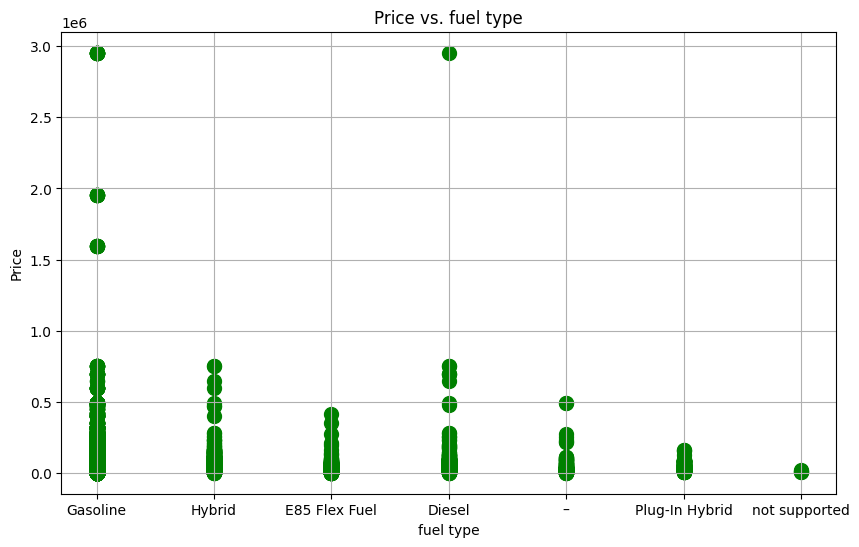

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['fuel_type'], df_train['price'], color='green', s=100)
plt.title('Price vs. fuel type')
plt.xlabel('fuel type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [35]:
df_train[df_train['fuel_type']=='not supported']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1069,Toyota,Mirai Base,2016,40000,not supported,151.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,None reported,Yes,14000
9621,Toyota,Mirai Limited,2023,29553,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Gray,None reported,Yes,9995
11441,Toyota,Mirai Limited,2018,40000,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Gray,None reported,Yes,7500
21771,Nissan,Armada Platinum,2017,92000,not supported,390.0HP 5.6L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Black,None reported,Yes,20900


In [36]:
df_train.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [37]:
df_train.dtypes

brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [38]:
label_encoder = LabelEncoder()
df_train['brand'] = label_encoder.fit_transform(df_train['brand'])
df_train['fuel_type'] = label_encoder.fit_transform(df_train['fuel_type'])
df_train['ext_col'] = label_encoder.fit_transform(df_train['ext_col'])
df_train['int_col'] = label_encoder.fit_transform(df_train['int_col'])
df_train['model'] = label_encoder.fit_transform(df_train['model'])

In [39]:
df_test['brand'] = label_encoder.fit_transform(df_test['brand'])
df_test['fuel_type'] = label_encoder.fit_transform(df_test['fuel_type'])
df_test['ext_col'] = label_encoder.fit_transform(df_test['ext_col'])
df_test['int_col'] = label_encoder.fit_transform(df_test['int_col'])
df_test['model'] = label_encoder.fit_transform(df_test['model'])

In [40]:
df_train['transmission'].value_counts()

transmission
A/T                                                   16757
8-Speed A/T                                            7287
Transmission w/Dual Shift Mode                         6454
6-Speed A/T                                            5944
6-Speed M/T                                            3618
7-Speed A/T                                            3415
10-Speed A/T                                           2187
8-Speed Automatic                                      1189
5-Speed A/T                                            1185
9-Speed A/T                                            1073
4-Speed A/T                                             764
5-Speed M/T                                             718
CVT Transmission                                        692
10-Speed Automatic                                      642
6-Speed Automatic                                       516
Automatic                                               441
M/T                        

In [41]:
def classify_transmission(trans):
    if 'A/T' in trans or 'Automatic' in trans:
        return 'Automatic'
    elif 'M/T' in trans or 'Manual' in trans or 'Mt' in trans:
        return 'Manual'
    elif 'CVT' in trans:
        return 'CVT'
    else:
        return 'Dual Shift Mode'

In [42]:
df_train['trans'] = df_train['transmission'].apply(classify_transmission)
df_test['trans'] = df_test['transmission'].apply(classify_transmission)

In [43]:
import re
def extract_info(spec):
    hp_match = re.search(r'(\d+\.?\d*)HP', spec)
    hp = hp_match.group(1) if hp_match else None

    displacement_match = re.search(r'(\d+\.\d+)L', spec)
    displacement = displacement_match.group(1) if displacement_match else None
    
    return pd.Series([hp, displacement])

In [44]:
df_train[['HP', 'cyl_capacity']] = df_train['engine'].apply(extract_info)
df_test[['HP', 'cyl_capacity']] = df_test['engine'].apply(extract_info)

In [45]:
def extract_engine_type(engine):
    if 'V6' in engine:
        return 'V6'
    elif 'V8' in engine:
        return 'V8'
    elif 'Straight 6' in engine:
        return 'Straight 6'
    else:
        return 'Other'

In [46]:
df_train['engine_type'] = df_train['engine'].apply(extract_engine_type)
df_test['engine_type'] = df_test['engine'].apply(extract_engine_type)

In [47]:
df_train['accident'] = df_train['accident'].map({'None reported':0, 'At least 1 accident or damage reported':1})
df_test['accident'] = df_test['accident'].map({'None reported':0, 'At least 1 accident or damage reported':1})

In [48]:
df_train.drop('clean_title', axis=1, inplace=True)

In [49]:
df_test.drop('clean_title', axis=1, inplace=True)

In [50]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,trans,HP,cyl_capacity,engine_type
0,14,644,2018,74349,2,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,26,57,0,11000,Automatic,375.0,3.5,V6
1,4,49,2007,80000,2,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,17,9,0,8250,Manual,300.0,3.0,Straight 6
2,21,1771,2009,91491,2,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,181,6,0,15000,Automatic,300.0,4.2,Other
3,4,1748,2022,2437,3,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,100,24,0,63500,Dual Shift Mode,335.0,3.0,Straight 6
4,40,693,2001,111000,2,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,249,9,0,7850,Automatic,200.0,3.8,V6


In [51]:
def classify_transmission2(trans):
    parts = trans.split('-') if '-' in trans else trans.split(' ')
    speed = parts[0] if 'Speed' in trans else None
    return speed

In [52]:
df_train['speed'] = df_train['transmission'].apply(classify_transmission2)
df_test['speed'] = df_test['transmission'].apply(classify_transmission2)

In [53]:
df_train.shape

(54273, 16)

In [54]:
def replace_nan_with_average(df):
    df['speed'] = pd.to_numeric(df['speed'], errors='coerce')
    average_speeds = df.groupby('trans')['speed'].mean()
    for category, avg_speed in average_speeds.items():
        df.loc[df['speed'].isna() & (df['trans'] == category), 'speed'] = avg_speed
    return df

# Test the function
df_train = replace_nan_with_average(df_train)
df_test = replace_nan_with_average(df_test)

In [55]:
# Convert the column to numeric, ignoring non-numeric values
df_train['speed'] = pd.to_numeric(df_train['speed'], errors='coerce')
df_test['speed'] = pd.to_numeric(df_test['speed'], errors='coerce')
# Calculate the mean of the column
mean_value = df_train['speed'].mean()
mean_value_test = df_test['speed'].mean()
# Replace missing values with the mean
df_train['speed'].fillna(mean_value, inplace=True)
df_test['speed'].fillna(mean_value_test, inplace=True)
# Convert the column to integers
df_train['speed'] = df_train['speed'].astype('int64')
df_test['speed'] = df_test['speed'].astype('int64')

In [56]:
df_train.drop(['engine', 'transmission'], axis=1, inplace=True)
df_test.drop(['engine', 'transmission'], axis=1, inplace=True)

In [57]:
df_train.isnull().sum().sort_values(ascending=False)

HP              4057
cyl_capacity     606
brand              0
model              0
model_year         0
milage             0
fuel_type          0
ext_col            0
int_col            0
accident           0
price              0
trans              0
engine_type        0
speed              0
dtype: int64

In [58]:
mode_per_group_train = df_train.groupby('trans')['cyl_capacity'].apply(lambda x: x.mode()[0])
mode_per_group_train

trans
Automatic          3.0
CVT                3.5
Dual Shift Mode    3.0
Manual             2.0
Name: cyl_capacity, dtype: object

In [59]:
mode_per_group_test = df_train.groupby('trans')['cyl_capacity'].apply(lambda x: x.mode()[0])
mode_per_group_test

trans
Automatic          3.0
CVT                3.5
Dual Shift Mode    3.0
Manual             2.0
Name: cyl_capacity, dtype: object

In [60]:
df_train['cyl_capacity'] = df_train.apply(lambda row: mode_per_group_train[row['trans']]
                              if pd.isna(row['cyl_capacity']) else row['cyl_capacity'],
                              axis=1)
df_test['cyl_capacity'] = df_test.apply(lambda row: mode_per_group_test[row['trans']]
                              if pd.isna(row['cyl_capacity']) else row['cyl_capacity'],
                              axis=1)

In [61]:
df_train.isnull().sum().sort_values(ascending=False)

HP              4057
brand              0
model              0
model_year         0
milage             0
fuel_type          0
ext_col            0
int_col            0
accident           0
price              0
trans              0
cyl_capacity       0
engine_type        0
speed              0
dtype: int64

In [62]:
mode_per_group_train = df_train.groupby('trans')['HP'].apply(lambda x: x.mode()[0])
mode_per_group_train

trans
Automatic          300.0
CVT                188.0
Dual Shift Mode    300.0
Manual             455.0
Name: HP, dtype: object

In [63]:
mode_per_group_test = df_test.groupby('trans')['HP'].apply(lambda x: x.mode()[0])
mode_per_group_test

trans
Automatic          300.0
CVT                188.0
Dual Shift Mode    300.0
Manual             455.0
Name: HP, dtype: object

In [64]:
df_train['HP'] = df_train.apply(lambda row: mode_per_group_train[row['trans']]
                    if pd.isna(row['HP']) else row['HP'],
                    axis=1)
df_test['HP'] = df_test.apply(lambda row: mode_per_group_test[row['trans']]
                    if pd.isna(row['HP']) else row['HP'],
                    axis=1)

In [65]:
df_train.isnull().sum().sort_values(ascending=False)

brand           0
model           0
model_year      0
milage          0
fuel_type       0
ext_col         0
int_col         0
accident        0
price           0
trans           0
HP              0
cyl_capacity    0
engine_type     0
speed           0
dtype: int64

In [66]:
df_train.head()

,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,price,trans,HP,cyl_capacity,engine_type,speed
0,14,644,2018,74349,2,26,57,0,11000,Automatic,375.0,3.5,V6,10
1,4,49,2007,80000,2,17,9,0,8250,Manual,300.0,3.0,Straight 6,6
2,21,1771,2009,91491,2,181,6,0,15000,Automatic,300.0,4.2,Other,6
3,4,1748,2022,2437,3,100,24,0,63500,Dual Shift Mode,335.0,3.0,Straight 6,6
4,40,693,2001,111000,2,249,9,0,7850,Automatic,200.0,3.8,V6,7


In [67]:
df_train['trans'] = df_train['trans'].map({'Automatic':0, 'Manual':1, 'Dual Shift Mode':3, 'CVT':4})
df_test['trans'] = df_test['trans'].map({'Automatic':0, 'Manual':1, 'Dual Shift Mode':3, 'CVT':4})

In [68]:
df_train['engine_type'].unique()

array(['V6', 'Straight 6', 'Other', 'V8'], dtype=object)

In [69]:
df_train['engine_type'] = df_train['engine_type'].map({'V6':0, 'Straight 6':1, 'Other':3, 'V8':4})
df_test['engine_type'] = df_test['engine_type'].map({'V6':0, 'Straight 6':1, 'Other':3, 'V8':4})

In [70]:
df_train.head()

,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,price,trans,HP,cyl_capacity,engine_type,speed
0,14,644,2018,74349,2,26,57,0,11000,0,375.0,3.5,0,10
1,4,49,2007,80000,2,17,9,0,8250,1,300.0,3.0,1,6
2,21,1771,2009,91491,2,181,6,0,15000,0,300.0,4.2,3,6
3,4,1748,2022,2437,3,100,24,0,63500,3,335.0,3.0,1,6
4,40,693,2001,111000,2,249,9,0,7850,0,200.0,3.8,0,7


In [71]:
df_train.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
ext_col         0
int_col         0
accident        0
price           0
trans           0
HP              0
cyl_capacity    0
engine_type     0
speed           0
dtype: int64

In [72]:
df_train.dtypes

brand            int64
model            int64
model_year       int64
milage           int64
fuel_type        int64
ext_col          int64
int_col          int64
accident         int64
price            int64
trans            int64
HP              object
cyl_capacity    object
engine_type      int64
speed            int64
dtype: object

In [73]:
df_train['cyl_capacity'] = df_train['cyl_capacity'].astype('float64')
df_train['HP'] = df_train['HP'].astype('float64')

In [74]:
df_train.dtypes

brand             int64
model             int64
model_year        int64
milage            int64
fuel_type         int64
ext_col           int64
int_col           int64
accident          int64
price             int64
trans             int64
HP              float64
cyl_capacity    float64
engine_type       int64
speed             int64
dtype: object

In [75]:
df_test.head()

,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,trans,HP,cyl_capacity,engine_type,speed
0,34,528,2014,73000,2,220,8,0,0,302.0,3.5,0,7
1,26,1246,2015,128032,2,187,10,0,0,275.0,3.5,0,8
2,34,317,2015,51983,2,26,107,0,0,241.0,2.0,3,7
3,25,1318,2018,29500,2,220,107,1,3,518.0,5.0,3,6
4,4,1710,2020,90000,2,220,10,1,0,335.0,3.0,1,8


In [76]:
df_test.dtypes

brand            int64
model            int64
model_year       int64
milage           int64
fuel_type        int64
ext_col          int64
int_col          int64
accident         int64
trans            int64
HP              object
cyl_capacity    object
engine_type      int64
speed            int64
dtype: object

In [77]:
df_test['cyl_capacity'] = df_test['cyl_capacity'].astype('float64')
df_test['HP'] = df_test['HP'].astype('float64')

In [78]:
df_test.describe()

,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,trans,HP,cyl_capacity,engine_type,speed
count,36183.000000,36183.000000,36183.000000,36183.000000,36183.000000,36183.000000,36183.000000,36183.000000,36183.000000,36183.000000,36183.000000,36183.000000,36183.000000
mean,20.582318,877.038526,2015.063953,72479.266755,1.995799,109.705884,23.433436,0.264903,0.503717,329.965011,3.717073,1.882099,6.908189
std,14.296537,531.404726,5.589336,50714.968252,0.487344,84.676938,26.990487,0.441288,1.061708,105.721904,1.333220,1.407131,1.178842
min,0.000000,0.000000,1974.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.650000,0.000000,1.000000
25%,9.000000,445.000000,2012.000000,31681.000000,2.000000,17.000000,10.000000,0.000000,0.000000,261.000000,3.000000,0.000000,6.000000
50%,17.000000,816.000000,2016.000000,65680.000000,2.000000,88.000000,10.000000,0.000000,0.000000,302.000000,3.500000,3.000000,7.000000
75%,34.000000,1350.000000,2019.000000,102000.000000,2.000000,220.000000,23.000000,1.000000,0.000000,395.000000,4.600000,3.000000,7.000000
max,52.000000,1790.000000,2024.000000,405000.000000,6.000000,229.000000,110.000000,1.000000,4.000000,835.000000,8.400000,4.000000,10.000000


In [79]:
df_test.shape

(36183, 13)

In [ ]:
corr_matrix = df_train.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10}, fmt=".2f")  
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)  
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()  
plt.show()

In [81]:
df_train.drop(['fuel_type'], axis=1, inplace=True)
df_test.drop(['fuel_type'], axis=1, inplace=True)

In [82]:
df_test.shape

(36183, 12)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train['milage'] = scaler.fit_transform(df_train[['milage']])
df_test['milage'] = scaler.fit_transform(df_test[['milage']])

In [ ]:
num_columns = df_train.shape[1]
num_rows = (num_columns + 2) // 3  # 3 columns per row, add 2 to round up

# Plot boxplots for all numerical features
plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(df_train.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=df_train[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(df_train.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df_train[column], kde=True)  # Use histplot for distribution plots
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
epsilon = 1e-8  # Small constant to avoid zero values, if necessary

df_train['price'] = np.log(df_train['price'])
df_train['int_col'] = np.log(df_train['int_col']+ epsilon)
df_test['int_col'] = np.log(df_test['int_col']+ epsilon)

In [ ]:
df_test.shape

(36183, 12)

In [ ]:
from scipy.stats import zscore
def remove_outliers_zscore(df, column_name, threshold=3):
    z_scores = zscore(df[column_name])
    mask = (z_scores < threshold) & (z_scores > -threshold)
    return df[mask]
df_train = remove_outliers_zscore(df_train, 'HP')
df_train = remove_outliers_zscore(df_train, 'price')

In [ ]:
df_test.shape

(36183, 12)

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [117]:
df_train = remove_outliers(df_train, 'milage')

In [116]:
df_test.shape

(36183, 12)

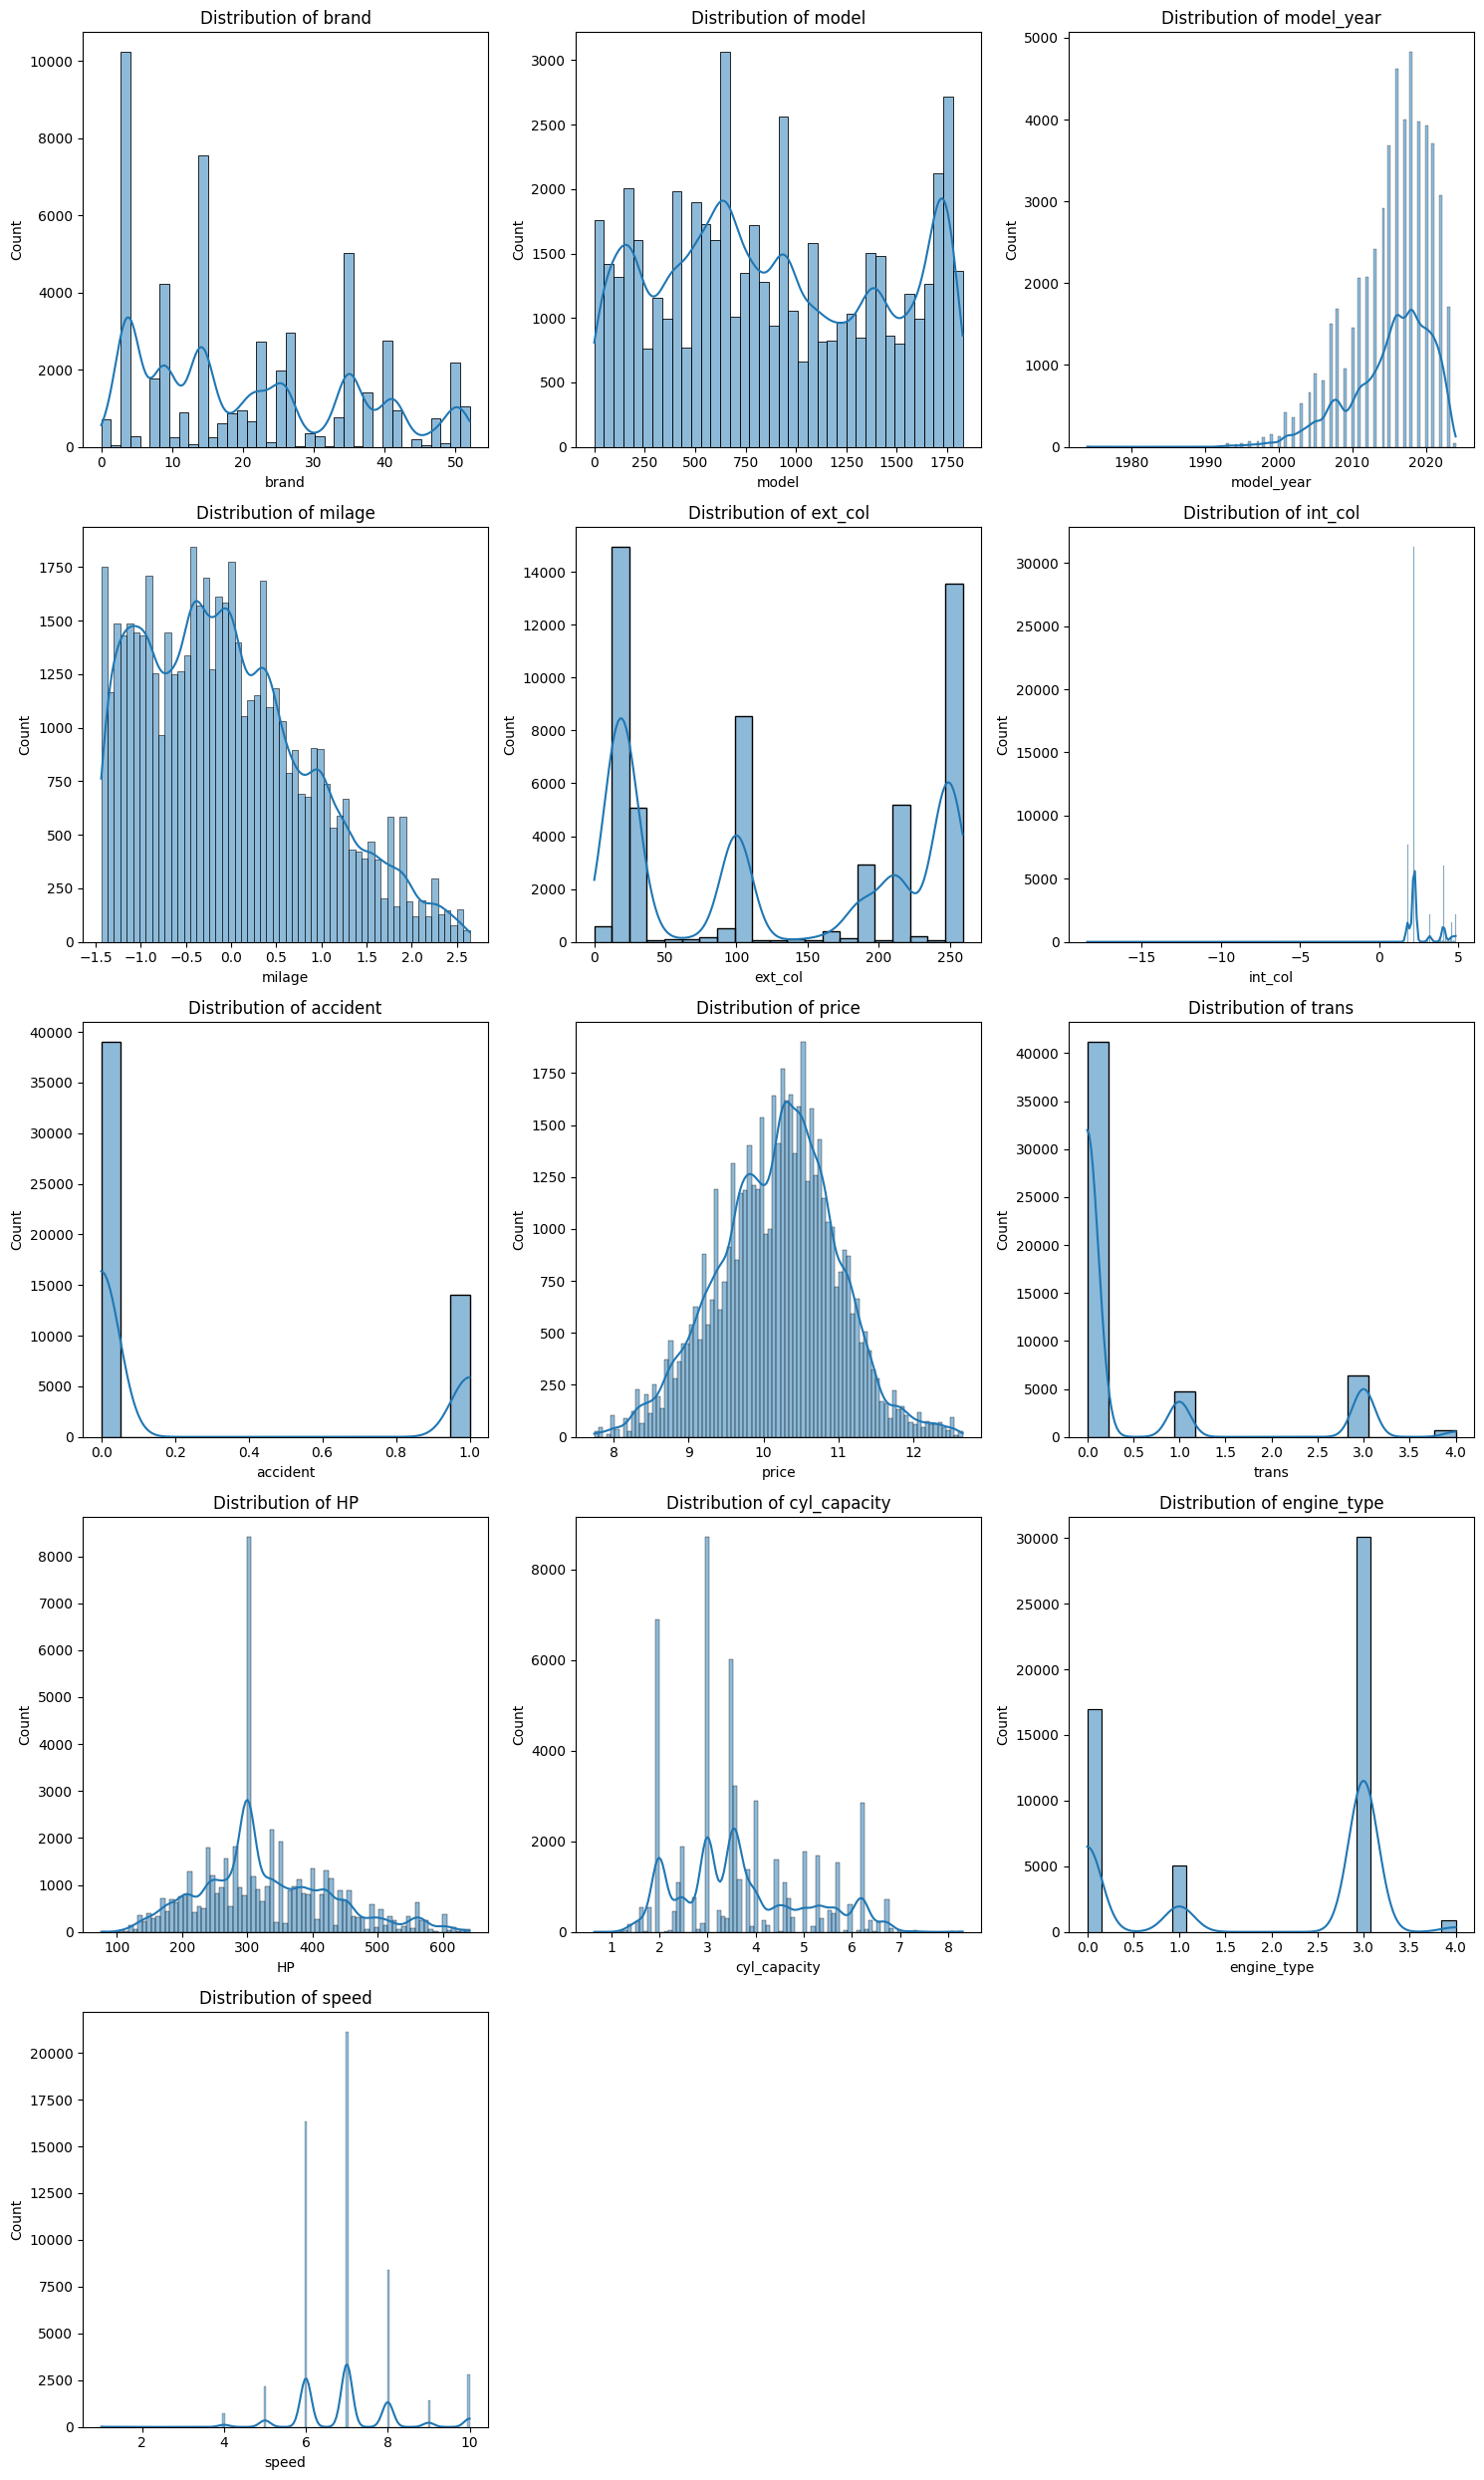

In [115]:
plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(df_train.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df_train[column], kde=True)  # Use histplot for distribution plots
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

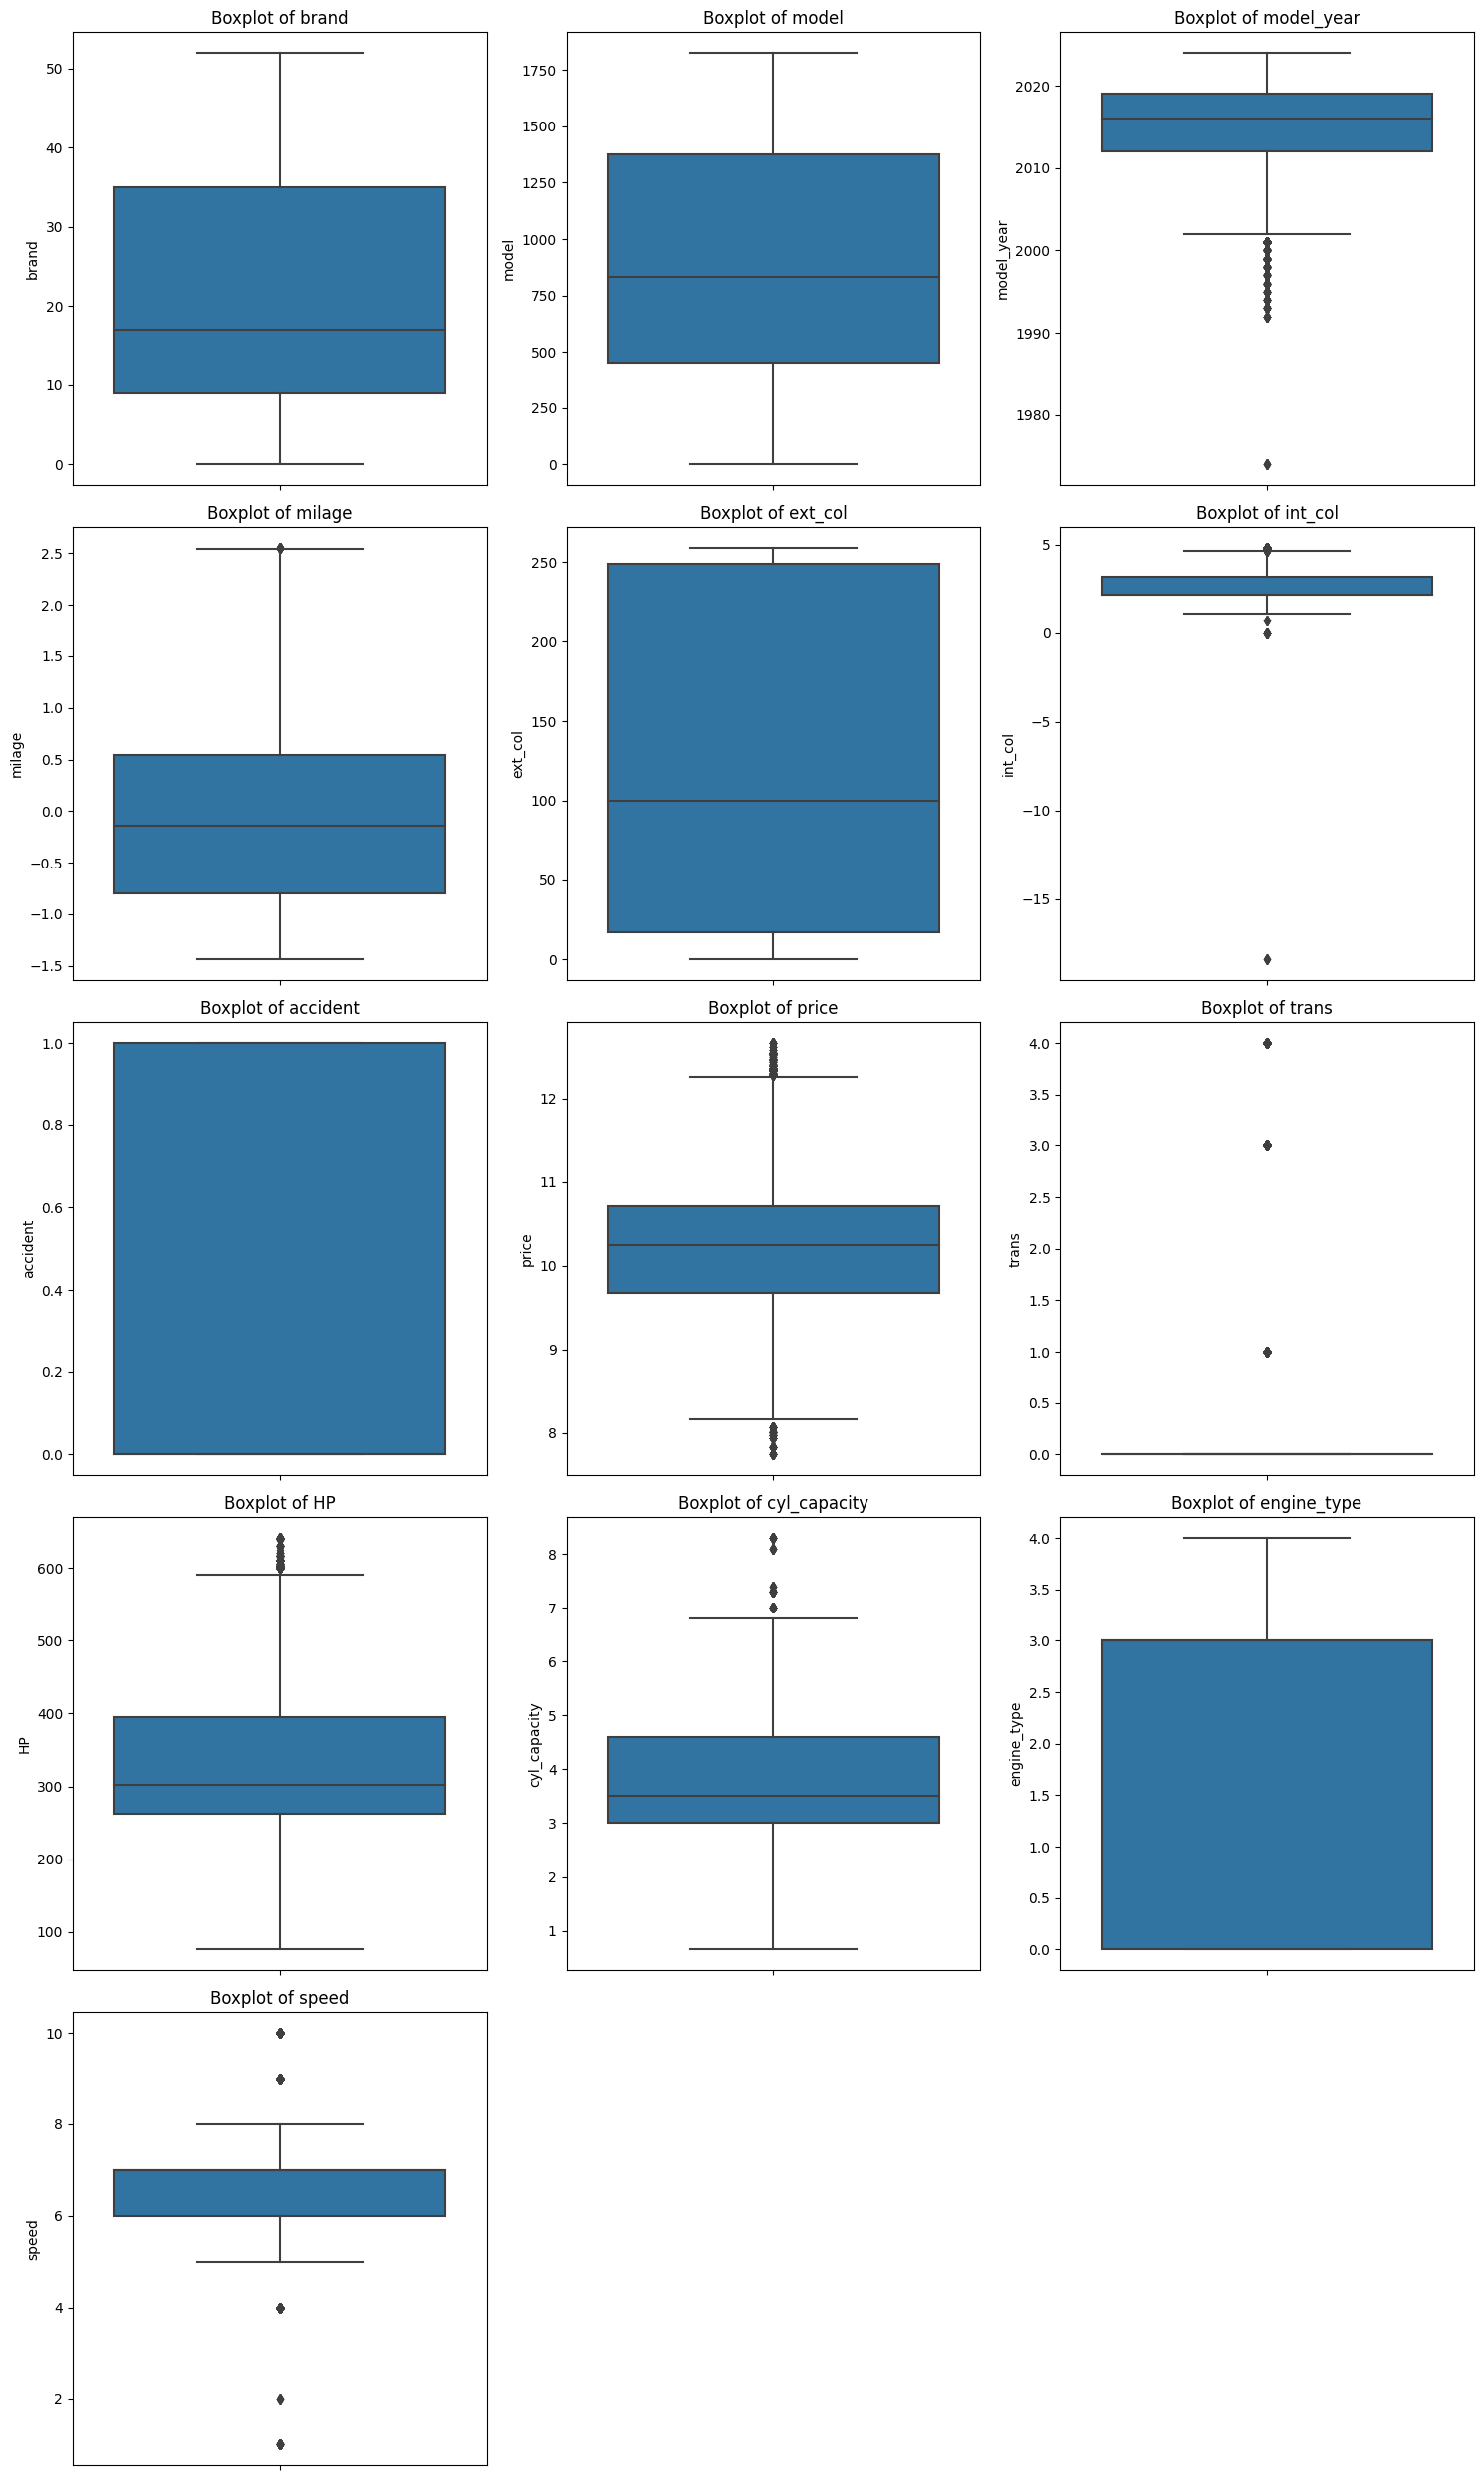

In [118]:
num_columns = df_train.shape[1]
num_rows = (num_columns + 2) // 3  # 3 columns per row, add 2 to round up

# Plot boxplots for all numerical features
plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(df_train.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=df_train[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [95]:
df_train.head()

,brand,model,model_year,milage,ext_col,int_col,accident,price,trans,HP,cyl_capacity,engine_type,speed
0,14,644,2018,0.031759,26,4.043051,0,9.305651,0,375.0,3.5,0,10
1,4,49,2007,0.143728,17,2.197225,0,9.017968,1,300.0,3.0,1,6
2,21,1771,2009,0.371412,181,1.791759,0,9.615805,0,300.0,4.2,3,6
3,4,1748,2022,-1.393115,100,3.178054,0,11.058795,3,335.0,3.0,1,6
4,40,693,2001,0.757966,249,2.197225,0,8.968269,0,200.0,3.8,0,7


In [96]:
df_test.shape

(36183, 12)

In [97]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [98]:
# Define models
model_dict = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Machine Regression': SVR(),
    'XGBoost Regression': xgb.XGBRegressor(),
    'GB Regressor': GradientBoostingRegressor(),
    'Ada Boost Regression': AdaBoostRegressor()
}

In [99]:
X = df_train.drop(['price'], axis=1)
y = df_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42412, 12), (10604, 12), (42412,), (10604,))

In [102]:
df_test.shape

(36183, 12)

In [103]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isinf(X_train)))

False
False


In [104]:
# Create pipelines
pipelines = {name: model for name, model in model_dict.items()}

# Dictionary to store RMSE results
rmse_results = {}

# Train models and calculate RMSE
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_results[name] = rmse

# Display RMSE results
rmse_results_sorted = dict(sorted(rmse_results.items(), key=lambda item: item[1]))
print(rmse_results_sorted)

{'XGBoost Regression': 0.45845688068880225, 'GB Regressor': 0.4632942703575619, 'Random Forest Regression': 0.46755221228642546, 'Linear Regression': 0.4897076687375805, 'Ada Boost Regression': 0.5280969097169352, 'Support Vector Machine Regression': 0.5857215650195068, 'Decision Tree Regression': 0.6459270509619017}


In [105]:
xgb_model = xgb.XGBRegressor()
linear_model = LinearRegression()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
# Predict using the test set
y_pred = xgb_model.predict(X_test)

In [107]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.21018271145090667
R-squared (R²): 0.6629571262653374


In [108]:
y_pred = xgb_model.predict(df_test)

In [109]:
y_pred.shape

(36183,)

In [110]:
y_pred = np.exp(y_pred)

In [111]:
y_pred.shape

(36183,)

In [112]:
# Create a DataFrame for submission
sub = pd.DataFrame({
    'id': test_id,  # Assuming 'Id' is the identifier column in your test data
    'price': y_pred
})

In [113]:
sub.to_csv('sub.csv', index=False)

In [114]:
sub.head(20)

,id,price
0,54273,26433.169922
1,54274,16428.232422
2,54275,31653.019531
3,54276,48358.160156
4,54277,28709.794922
5,54278,69486.492188
6,54279,40476.648438
7,54280,32341.535156
8,54281,12755.188477
9,54282,57999.476562
